In [1]:
import pickle
from dataprocessing import load_data
from sklearn.metrics import classification_report
import numpy as np
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from xgboost import plot_importance
import shap
import pandas as pd
%matplotlib inline

In [2]:
with open("../data/model5.pickle","rb") as picklefile:
    model = pickle.load(picklefile)

## Finding the right threshold

With our current 0.5 probability threshold, we are doing poorly in classificaiton. If we tweaked the threshold to another number, perhaps we would be doing a better job at predicting

In [3]:
X_train, X_test, y_train, y_test = load_data("../data/healthcare-dataset-stroke-data.csv")

       age  hypertension  heart_disease  avg_glucose_level   bmi  \
4673  42.0           0.0            0.0             112.98  37.2   
3232  78.0           0.0            0.0              78.29  30.1   
3694  28.0           0.0            0.0              73.27  25.4   
1070  81.0           0.0            0.0             246.34  21.1   
4163  52.0           0.0            0.0              97.05  28.0   
...    ...           ...            ...                ...   ...   
1714   8.0           0.0            0.0             101.26  33.8   
3774  11.0           0.0            0.0              76.74  19.1   
3080  74.0           0.0            0.0              83.58  18.2   
988   20.0           0.0            0.0             100.33  27.8   
1041  30.0           0.0            0.0             110.55  30.9   

      is_user_diabetic  pre_existing  gender_Female  gender_Male  \
4673               0.0           0.0            1.0          0.0   
3232               0.0           0.0           

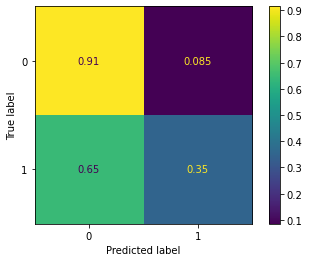

In [4]:

predictions = model.predict(X_test)
cm = confusion_matrix(y_test, predictions,normalize = 'true', labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot() 


       age  hypertension  heart_disease  avg_glucose_level   bmi  \
4673  42.0           0.0            0.0             112.98  37.2   
3232  78.0           0.0            0.0              78.29  30.1   
3694  28.0           0.0            0.0              73.27  25.4   
1070  81.0           0.0            0.0             246.34  21.1   
4163  52.0           0.0            0.0              97.05  28.0   
...    ...           ...            ...                ...   ...   
1714   8.0           0.0            0.0             101.26  33.8   
3774  11.0           0.0            0.0              76.74  19.1   
3080  74.0           0.0            0.0              83.58  18.2   
988   20.0           0.0            0.0             100.33  27.8   
1041  30.0           0.0            0.0             110.55  30.9   

      is_user_diabetic  pre_existing  gender_Female  gender_Male  \
4673               0.0           0.0            1.0          0.0   
3232               0.0           0.0           

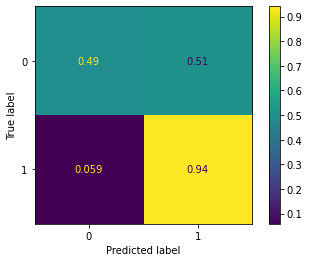

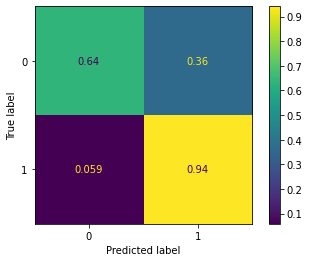

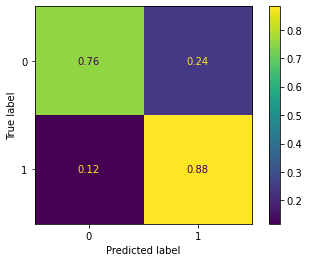

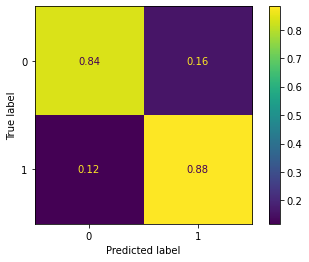

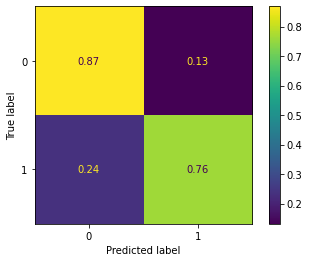

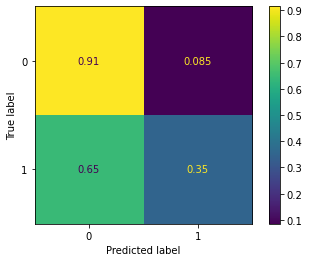

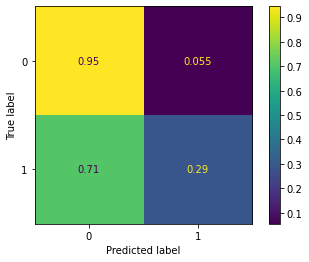

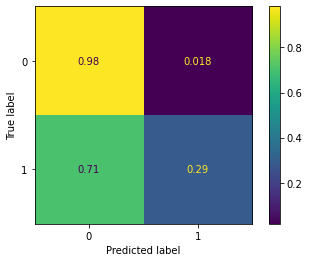

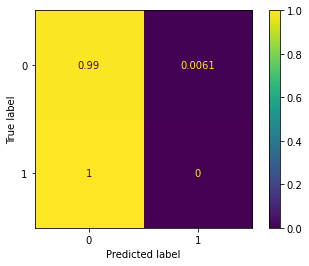

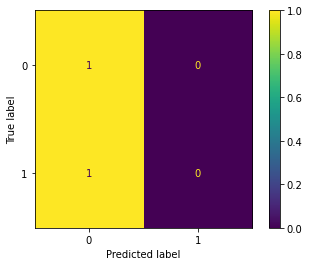

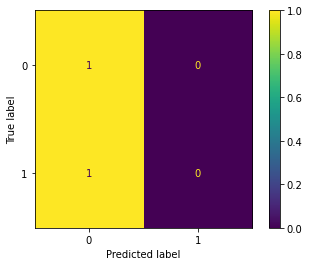

In [5]:
prediction_probas = model.predict_proba(X_test)[:,-1]



thresholds = [0.05,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]

for i in thresholds:
    rounded_prediction = np.where(prediction_probas >= i , 1, 0)
    print("Threshold: {}".format(i))
    cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                       display_labels=model.classes_)
    disp.plot()


Threshold: 1


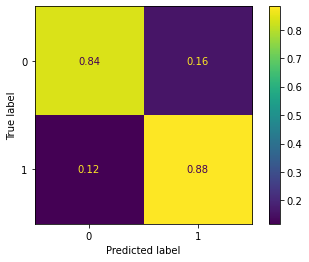

In [6]:
rounded_prediction = np.where(prediction_probas >= 0.3 , 1, 0)
print("Threshold: {}".format(i))
cm =  confusion_matrix(y_test,rounded_prediction,labels = model.classes_,normalize = 'true')
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                    display_labels=model.classes_)
disp.plot()

## Seems like the golden mark for our classifying threshhold is 0.3, it has the best confusion matrix, with and 88% true pos rate and an 84% true neg rate



## Feature importance

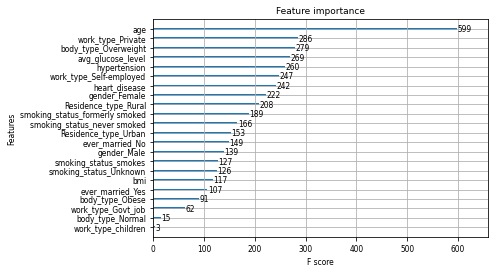

In [7]:
plt.rcParams.update({'font.size': 7.5})
ax = plot_importance(model['pred'])


## Seems like the most important features is avg_glucose_level, age , bmi, its important to stay healthy, and young!


## Lets plot SHAP values and see what

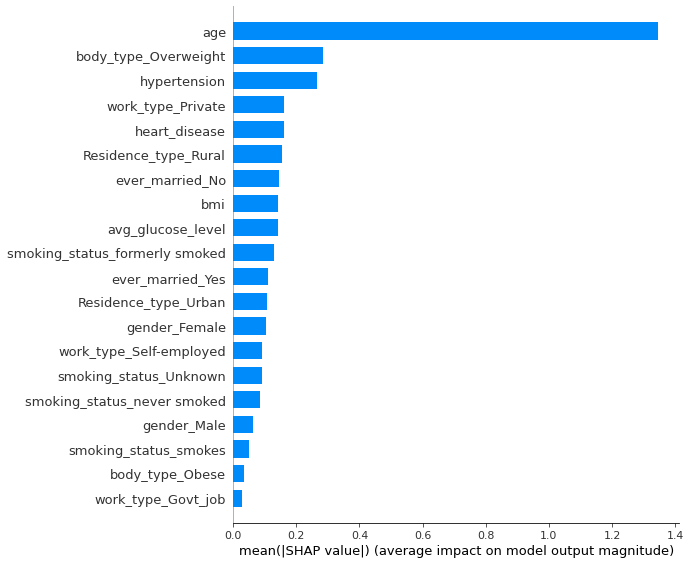

In [10]:
explainer = shap.TreeExplainer(model["pred"])
cleaned_data = pd.read_csv("../data/cleaned_data.csv")
cleaned_data.index = pd.Index(cleaned_data["Unnamed: 0"],name = "ID")
cleaned_data.drop(columns = ["Unnamed: 0"],axis = 1, inplace = True)

shap_values = explainer.shap_values(cleaned_data)
shap.initjs()
shap.summary_plot(shap_values,cleaned_data,plot_type='bar')

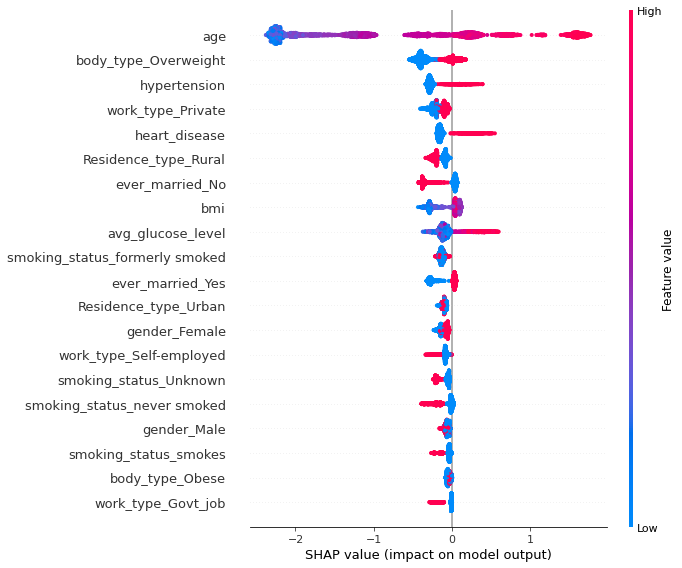

In [11]:
shap.summary_plot(shap_values,cleaned_data)

## To avoid strokes, be young and keep healthy, don't smoke, live in rural areas!